In [2]:
import pandas as pd
from xgboost import XGBClassifier
import numpy as np

from sklearn.datasets import load_iris



In [3]:
data = pd.read_csv('surv_pred/Clinical.csv').set_index('patient').dropna()

In [4]:
y = list(np.arange(len(data)))

In [5]:
X = data.to_numpy()

In [7]:
bst = XGBClassifier(n_estimators=1, max_depth=2, learning_rate=1, objective='binary:logistic')

In [8]:
bst.fit(X, y, verbose=1)

In [1]:
preds = bst.predict(X)

NameError: name 'bst' is not defined

In [135]:
import pandas as pd

In [199]:
df = pd.read_csv('/mnt/drive1/home/ohaddoron1/Projects/ohad/clinical_data_new.tsv', sep='\t',
                 na_values=['not reported', 'Not Reported'])
df

/mnt/drive1/home/ohaddoron1/.virtualenvs/ohad/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,31,70,71,72,73,86,108,117,119) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,project,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,age_at_diagnosis,...,asbestos_exposure,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_smoking_onset_year,respirable_crystalline_silica_exposure,time_between_waking_and_first_smoke,coal_dust_exposure,cause_of_death,premature_at_birth,weeks_gestation_at_birth
0,TCGA-BRCA,TCGA-E2-A154,No,Stage I,0.0,NaN,NaN,"Breast, NOS",591.0,24999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-BRCA,TCGA-LL-A5YM,No,Stage IIIB,0.0,NaN,NaN,"Breast, NOS",394.0,32478.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-BRCA,TCGA-AO-A0J6,No,Stage IIA,0.0,NaN,NaN,"Breast, NOS",1140.0,22462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-BRCA,TCGA-D8-A1XA,No,Stage IA,0.0,NaN,NaN,"Breast, NOS",839.0,23387.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-BRCA,TCGA-E9-A1R7,No,Stage IIA,0.0,NaN,NaN,"Breast, NOS",1467.0,23397.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11310,TCGA-STAD,TCGA-BR-7851,No,Stage IIB,0.0,NaN,NaN,Body of stomach,574.0,27091.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11311,TCGA-STAD,TCGA-EQ-A4SO,No,Stage IIIB,0.0,NaN,NaN,Gastric antrum,494.0,25897.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11312,TCGA-STAD,TCGA-CD-8530,No,Stage II,0.0,NaN,NaN,Fundus of stomach,377.0,18992.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11313,TCGA-STAD,TCGA-FP-A4BF,No,Stage IIIA,0.0,NaN,NaN,"Cardia, NOS",47.0,25030.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
info = [{'name': col, 'value': len(df[col].value_counts()) == df.shape[0]} for col in df.columns]

In [201]:
list(filter(lambda x: x['value'], info))

[{'name': 'submitter_id', 'value': True},
 {'name': 'bcr_patient_barcode', 'value': True}]

In [202]:
df.last_known_disease_status.unique()

array([nan])

In [203]:
print('~~ MISSING DATA ~~')
print()

n = df.shape[0]

for col in df.columns:
    if col in ['submitter_id', 'days_to_death', 'days_to_last_follow_up', 'vital_status', 'age_at_diagnosis']:
        continue

    n_levels = len(df[col].value_counts())

    if n_levels == n:
        df = df.drop(columns=[col])
    else:
        n_missing = sum(df[col].isnull())
        if round(n_missing / n * 100, 2) > 80:
            df = df.drop(columns=[col])
        else:
            print(f'{col}: {n_missing} ({round(n_missing / n * 100, 2)}%)')
for col in df.columns:
    if len(df[col].value_counts()) == 1:
        df.drop(columns=[col], inplace=True)


~~ MISSING DATA ~~

project: 0 (0.0%)
synchronous_malignancy: 2075 (18.34%)
ajcc_pathologic_stage: 4368 (38.6%)
days_to_diagnosis: 276 (2.44%)
tissue_or_organ_of_origin: 148 (1.31%)
primary_diagnosis: 148 (1.31%)
updated_datetime: 148 (1.31%)
prior_malignancy: 1294 (11.44%)
year_of_diagnosis: 281 (2.48%)
state: 148 (1.31%)
prior_treatment: 156 (1.38%)
ajcc_staging_system_edition: 4918 (43.46%)
ajcc_pathologic_t: 3426 (30.28%)
morphology: 148 (1.31%)
ajcc_pathologic_n: 3474 (30.7%)
ajcc_pathologic_m: 4346 (38.41%)
diagnosis_id: 148 (1.31%)
icd_10_code: 352 (3.11%)
site_of_resection_or_biopsy: 148 (1.31%)
exposure_id: 148 (1.31%)
race: 1147 (10.14%)
gender: 152 (1.34%)
ethnicity: 2519 (22.26%)
age_at_index: 205 (1.81%)
days_to_birth: 273 (2.41%)
year_of_birth: 321 (2.84%)
demographic_id: 148 (1.31%)
year_of_death: 8610 (76.09%)
treatments_pharmaceutical_treatment_id: 148 (1.31%)
treatments_pharmaceutical_treatment_type: 148 (1.31%)
treatments_pharmaceutical_treatment_or_therapy: 1448 (12

In [204]:
clinical = df.copy()

In [205]:

print('~~ MISSING DATA ~~')
print()

n = clinical.shape[0]

for v in clinical.columns:
    n_missing = sum(clinical[v].isnull())
    if n_missing > 0:
        if n_missing == n:
            clinical = clinical.drop(columns=[v])
        else:
            print(f'{v}: {n_missing} ({round(n_missing / n * 100, 2)}%)')

~~ MISSING DATA ~~

synchronous_malignancy: 2075 (18.34%)
ajcc_pathologic_stage: 4368 (38.6%)
tissue_or_organ_of_origin: 148 (1.31%)
days_to_last_follow_up: 2182 (19.28%)
age_at_diagnosis: 273 (2.41%)
primary_diagnosis: 148 (1.31%)
updated_datetime: 148 (1.31%)
prior_malignancy: 1294 (11.44%)
year_of_diagnosis: 281 (2.48%)
prior_treatment: 156 (1.38%)
ajcc_staging_system_edition: 4918 (43.46%)
ajcc_pathologic_t: 3426 (30.28%)
morphology: 148 (1.31%)
ajcc_pathologic_n: 3474 (30.7%)
ajcc_pathologic_m: 4346 (38.41%)
diagnosis_id: 148 (1.31%)
icd_10_code: 352 (3.11%)
site_of_resection_or_biopsy: 148 (1.31%)
exposure_id: 148 (1.31%)
race: 1147 (10.14%)
gender: 152 (1.34%)
ethnicity: 2519 (22.26%)
vital_status: 164 (1.45%)
age_at_index: 205 (1.81%)
days_to_birth: 273 (2.41%)
year_of_birth: 321 (2.84%)
demographic_id: 148 (1.31%)
year_of_death: 8610 (76.09%)
days_to_death: 7713 (68.17%)
treatments_pharmaceutical_treatment_id: 148 (1.31%)
treatments_pharmaceutical_treatment_or_therapy: 1448 (1

In [206]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11315 entries, 0 to 11314
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   project                                         11315 non-null  object 
 1   submitter_id                                    11315 non-null  object 
 2   synchronous_malignancy                          9240 non-null   object 
 3   ajcc_pathologic_stage                           6947 non-null   object 
 4   tissue_or_organ_of_origin                       11167 non-null  object 
 5   days_to_last_follow_up                          9133 non-null   float64
 6   age_at_diagnosis                                11042 non-null  float64
 7   primary_diagnosis                               11167 non-null  object 
 8   updated_datetime                                11167 non-null  object 
 9   prior_malignancy                       

In [207]:
clinical['gender'].value_counts()

female    5817
male      5346
Name: gender, dtype: int64

In [208]:
clinical['race'].value_counts()

white                                        8457
black or african american                     985
asian                                         685
american indian or alaska native               28
native hawaiian or other pacific islander      13
Name: race, dtype: int64

In [209]:
clinical['ethnicity'].value_counts()


not hispanic or latino    8412
hispanic or latino         384
Name: ethnicity, dtype: int64

In [210]:
clinical['prior_malignancy'].value_counts()


no     9092
yes     929
Name: prior_malignancy, dtype: int64

In [211]:
clinical['vital_status'].value_counts()


Alive    7510
Dead     3641
Name: vital_status, dtype: int64

<AxesSubplot:ylabel='Frequency'>

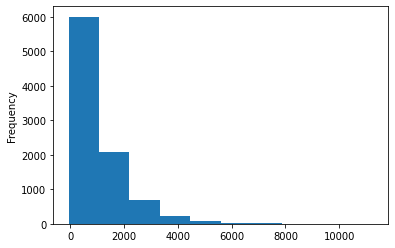

In [212]:
clinical['days_to_last_follow_up'].plot(kind='hist')


<AxesSubplot:>

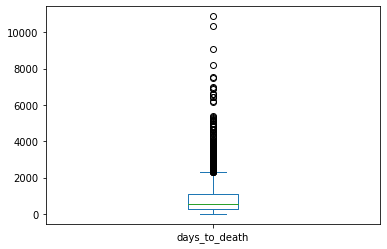

In [213]:
clinical['days_to_death'].plot(kind='box')


<AxesSubplot:>

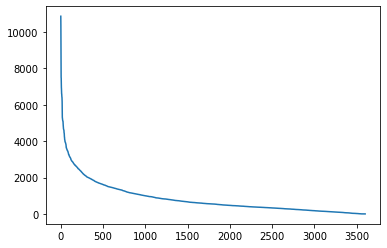

In [214]:
clinical['days_to_death'].sort_values(ascending=False).plot(use_index=False)


<AxesSubplot:>

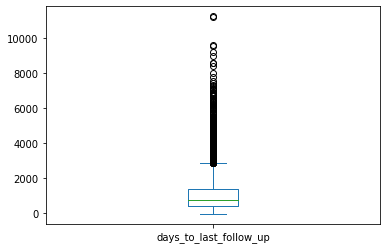

In [215]:
clinical['days_to_last_follow_up'].plot(kind='box')


<AxesSubplot:>

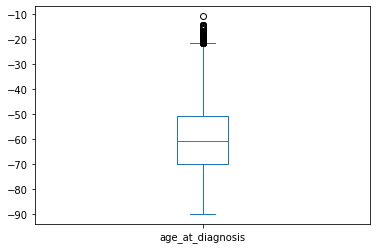

In [216]:
clinical['age_at_diagnosis'].apply(lambda x: -x / 365).plot(kind='box')


<AxesSubplot:>

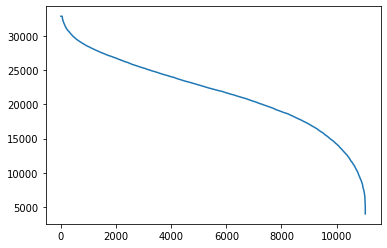

In [217]:
clinical['age_at_diagnosis'].sort_values(ascending=False).plot(use_index=False)


In [218]:
clinical.describe()


,days_to_last_follow_up,age_at_diagnosis,year_of_diagnosis,age_at_index,days_to_birth,year_of_birth,year_of_death,days_to_death
count,9133.000000,11042.000000,11034.000000,11110.000000,11042.000000,10994.000000,2705.000000,3602.000000
mean,1034.453411,21763.424380,2008.034620,59.100360,-21763.424380,1948.998090,2006.194455,842.895614
std,1048.312617,5266.400415,4.321537,14.415485,5266.400415,14.951509,4.426408,943.257919
min,-64.000000,3982.000000,1978.000000,10.000000,-32872.000000,1902.000000,1990.000000,0.000000
25%,375.000000,18516.250000,2006.000000,50.000000,-25611.250000,1938.000000,2004.000000,273.000000
50%,717.000000,22223.500000,2009.000000,60.000000,-22223.500000,1948.000000,2007.000000,545.000000
75%,1373.000000,25611.250000,2011.000000,70.000000,-18516.250000,1958.000000,2009.000000,1088.000000
max,11252.000000,32872.000000,2013.000000,90.000000,-3982.000000,1997.000000,2014.000000,10870.000000


In [219]:
import numpy as np

clinical.drop(columns=['days_to_birth', 'year_of_birth'], inplace=True)

In [220]:
clinical.describe()

,days_to_last_follow_up,age_at_diagnosis,year_of_diagnosis,age_at_index,year_of_death,days_to_death
count,9133.000000,11042.000000,11034.000000,11110.000000,2705.000000,3602.000000
mean,1034.453411,21763.424380,2008.034620,59.100360,2006.194455,842.895614
std,1048.312617,5266.400415,4.321537,14.415485,4.426408,943.257919
min,-64.000000,3982.000000,1978.000000,10.000000,1990.000000,0.000000
25%,375.000000,18516.250000,2006.000000,50.000000,2004.000000,273.000000
50%,717.000000,22223.500000,2009.000000,60.000000,2007.000000,545.000000
75%,1373.000000,25611.250000,2011.000000,70.000000,2009.000000,1088.000000
max,11252.000000,32872.000000,2013.000000,90.000000,2014.000000,10870.000000


In [221]:
clinical['project'].value_counts()
clinical = clinical.set_index('submitter_id')

In [222]:
race_subset = clinical['race'].isnull()
ethnicity_subset = ~clinical['ethnicity'].isnull()
subset = race_subset & ethnicity_subset
clinical.loc[subset, 'race'] = clinical.loc[subset, 'ethnicity']

In [223]:
race_subset = (clinical['race'] == 'white')
ethnicity_subset = (~clinical['ethnicity'].isnull() &
                    (clinical['ethnicity'] == 'hispanic or latino'))
subset = race_subset & ethnicity_subset
clinical.loc[subset, 'race'] = clinical.loc[subset, 'ethnicity']

In [224]:
clinical['race'].value_counts()


white                                        8144
black or african american                     985
asian                                         685
hispanic or latino                            355
not hispanic or latino                         38
american indian or alaska native               28
native hawaiian or other pacific islander      13
Name: race, dtype: int64

In [225]:
clinical = clinical.drop('ethnicity', axis=1)

In [226]:
subset = ~clinical.vital_status.isna()
clinical = clinical.loc[subset]

In [227]:
missing_duration_data = clinical[
    clinical['days_to_death'].isna() &
    clinical['days_to_last_follow_up'].isna()]

print('# patients missing both duration columns:', missing_duration_data.shape[0])

# patients missing both duration columns: 53


In [228]:
missing_duration_data.head()

,project,synchronous_malignancy,ajcc_pathologic_stage,tissue_or_organ_of_origin,days_to_last_follow_up,age_at_diagnosis,primary_diagnosis,updated_datetime,prior_malignancy,year_of_diagnosis,...,gender,vital_status,age_at_index,demographic_id,year_of_death,days_to_death,treatments_pharmaceutical_treatment_id,treatments_pharmaceutical_treatment_or_therapy,treatments_radiation_treatment_id,treatments_radiation_treatment_or_therapy
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-AJ-A3BH,TCGA-UCEC,No,NaN,Endometrium,NaN,NaN,"Endometrioid adenocarcinoma, NOS",2019-08-27T13:07:47.348739-05:00,no,2011.0,...,female,Alive,NaN,1974fb64-2bf1-5ae4-a1d3-549373310899,NaN,NaN,3f0aeb62-af22-5068-8b8c-ecaa102689eb,NaN,712d6c72-03e3-563c-a608-66fac6735f30,NaN
TCGA-AA-3521,TCGA-COAD,NaN,Stage II,Sigmoid colon,NaN,31805.0,"Adenocarcinoma, NOS",2019-08-08T16:34:13.342472-05:00,yes,2007.0,...,male,Alive,87.0,ec8b85ac-6080-5adc-b5ae-6b0bc24312e6,NaN,NaN,eaadd834-b435-55fc-9017-732f6ec5ae53,NaN,0a949d3f-fef3-545a-8358-dfa078ea6843,NaN
TCGA-GV-A3QG,TCGA-BLCA,NaN,Stage IV,Posterior wall of bladder,NaN,23847.0,Transitional cell carcinoma,2019-08-08T16:18:08.484365-05:00,yes,2011.0,...,male,Dead,65.0,4bb44c58-e698-5724-b813-cce20ea33af4,NaN,NaN,85e9f634-405c-5619-a625-dfb561828d27,no,571db996-6eb7-5755-943f-1aa53e48e398,no
TCGA-KN-8430,TCGA-KICH,No,Stage I,"Kidney, NOS",NaN,27467.0,"Renal cell carcinoma, chromophobe type",2019-08-08T16:49:14.932349-05:00,yes,2007.0,...,male,Dead,75.0,09aac3cf-d29f-5975-9a97-16b8cd81e9b3,NaN,NaN,203b2282-e20c-5860-b015-97476ea5386d,no,a50e4d44-0e9a-5130-8d0a-1956db244ce0,no
TCGA-CQ-A4CA,TCGA-HNSC,No,Stage II,"Ventral surface of tongue, NOS",NaN,NaN,"Squamous cell carcinoma, NOS",2019-08-08T16:45:33.461938-05:00,no,2011.0,...,male,Alive,NaN,6ec5867b-aae8-5612-87e9-2faee4216447,NaN,NaN,095887bb-b293-5d75-9ff8-bcebf006be83,no,721fb227-d59e-5c04-b605-6e8bcc460bae,no


In [252]:
clinical.rename(columns={'project': 'project_id'}, inplace=True)

In [229]:
subset = ~(clinical['days_to_death'].isna() &
           clinical['days_to_last_follow_up'].isna())
clinical = clinical.loc[subset]

In [230]:
clinical.shape

(11098, 31)

In [231]:
print('# patients missing "days_to_last_follow_up" when "vital_status" is "Alive":',
      clinical[(clinical.vital_status == 'Alive') &
               clinical.days_to_last_follow_up.isna()].shape[0])

# patients missing "days_to_last_follow_up" when "vital_status" is "Alive": 0


In [232]:
print('# patients missing "days_to_death" when "vital_status" is "Dead":',
      clinical[(clinical.vital_status == 'Dead') &
               clinical.days_to_death.isna()].shape[0])

# patients missing "days_to_death" when "vital_status" is "Dead": 11


In [233]:
# Remove missing data
subset = ~((clinical.vital_status == 'Dead') &
           clinical.days_to_death.isna())
clinical = clinical.loc[subset]

In [234]:
print('"Days to death" variable missing for all patients still alive?',
      all(clinical[clinical.vital_status == 'Alive'].days_to_death.isna()))

"Days to death" variable missing for all patients still alive? True


In [235]:
print('"Days to last follow up" variable missing for all dead patients?',
      all(clinical[clinical.vital_status == 'Dead'].days_to_last_follow_up.isna()))

"Days to last follow up" variable missing for all dead patients? False


In [236]:
# Insert "NaN" in "days_to_last_follow_up" when "vital_status" is "Dead"
subset = clinical.vital_status == 'Dead'
clinical.loc[subset, 'days_to_last_follow_up'] = None

In [237]:
print('"Days to last follow up" variable missing for all dead patients?',
      all(clinical[clinical.vital_status == 'Dead'].days_to_last_follow_up.isna()))


"Days to last follow up" variable missing for all dead patients? True


In [238]:
clinical[clinical.days_to_last_follow_up < 0]


,project,synchronous_malignancy,ajcc_pathologic_stage,tissue_or_organ_of_origin,days_to_last_follow_up,age_at_diagnosis,primary_diagnosis,updated_datetime,prior_malignancy,year_of_diagnosis,...,gender,vital_status,age_at_index,demographic_id,year_of_death,days_to_death,treatments_pharmaceutical_treatment_id,treatments_pharmaceutical_treatment_or_therapy,treatments_radiation_treatment_id,treatments_radiation_treatment_or_therapy
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-PL-A8LV,TCGA-BRCA,No,Stage IIIB,"Breast, NOS",-7.0,19746.0,"Medullary carcinoma, NOS",2019-08-08T16:30:14.878156-05:00,no,2013.0,...,female,Alive,54.0,53fb5a5f-60d3-55d7-9777-3ed3ef240243,NaN,NaN,97e527cf-2fd2-5434-8476-098d84da8aa9,NaN,5c4e2c67-cd11-579d-9013-27e79fac9af3,no
TCGA-AX-A3FV,TCGA-UCEC,No,NaN,Endometrium,-6.0,22752.0,"Endometrioid adenocarcinoma, NOS",2019-08-27T13:08:55.229228-05:00,no,2009.0,...,female,Alive,62.0,68eeb680-0c16-5cd2-ad66-077e1551696c,NaN,NaN,825bcf89-04f6-5d73-b31f-537a3f43b279,NaN,521523e4-353b-5e8d-bf02-62daef0086d1,NaN
TCGA-CF-A9FH,TCGA-BLCA,No,Stage II,"Bladder, NOS",-64.0,31236.0,Papillary transitional cell carcinoma,2019-08-08T16:15:48.249297-05:00,no,2013.0,...,male,Alive,85.0,4eae84b6-4952-5ba9-9ab4-49aab283b882,NaN,NaN,1dfbf1c2-173e-5790-9acb-28127248e419,no,84fe61c4-54b3-57e0-822a-5fbe7397425c,no
TCGA-NQ-A638,TCGA-MESO,No,Stage II,"Pleura, NOS",-8.0,24410.0,"Mesothelioma, malignant",2019-08-08T17:15:03.198560-05:00,no,2012.0,...,male,Alive,66.0,f5385979-be48-594b-99a1-e9f68888b0f3,NaN,NaN,919e4885-2b1a-5a6d-a840-887c5c54a9dc,NaN,11665120-db3e-53fa-9e40-a7a149631696,NaN
TCGA-TQ-A7RS,TCGA-LGG,No,NaN,Cerebrum,-1.0,9172.0,"Oligodendroglioma, NOS",2019-08-08T17:04:26.950565-05:00,no,2012.0,...,female,Alive,25.0,f0da64d6-1535-5270-a4e3-0d0adc458e89,NaN,NaN,f72dcd95-2511-5da8-930f-9b9da61fa25c,no,c5a0a602-9def-54be-b4a3-be1aa8ffc8c1,no
TCGA-EB-A430,TCGA-SKCM,No,Stage IIC,"Skin, NOS",-2.0,30344.0,Nodular melanoma,2019-08-08T17:30:38.814901-05:00,no,2012.0,...,male,Alive,83.0,4a4515a2-19f4-56d1-b99e-e6e28d21e508,NaN,NaN,4c4924f8-a46c-5182-9002-a98e00abb375,no,524a9ace-c0cf-51c9-bd48-052be0193908,no


In [239]:
subset = ~((clinical.days_to_last_follow_up < 0) &
           (clinical.vital_status == 'Alive'))
clinical = clinical.loc[subset]

In [240]:
clinical.shape

(11081, 31)

In [241]:
def get_duration(vital_status, days_to_death, days_to_last_follow_up):
    if vital_status == 'Dead':
        return days_to_death
    elif vital_status == 'Alive':
        return days_to_last_follow_up
    else:
        print('Found NaN in duration!')


def get_events(vital_status):
    if vital_status in ['1', 'Dead']:
        return 1
    elif vital_status in ['0', 'Alive']:
        return 0
    else:
        print('Found NaN in vital status!')

In [242]:
d = {'submitter_id': clinical.index,
     'time': clinical.apply(
         lambda x: get_duration(x['vital_status'], x['days_to_death'],
                                x['days_to_last_follow_up']), axis=1).values,
     'event': clinical.apply(
         lambda x: get_events(x['vital_status']), axis=1).values}

In [243]:
d

{'submitter_id': Index(['TCGA-E2-A154', 'TCGA-LL-A5YM', 'TCGA-AO-A0J6', 'TCGA-D8-A1XA',
        'TCGA-E9-A1R7', 'TCGA-B6-A1KN', 'TCGA-A2-A25B', 'TCGA-A2-A0ER',
        'TCGA-BH-A18G', 'TCGA-A2-A0CM',
        ...
        'TCGA-CD-A4MG', 'TCGA-BR-8679', 'TCGA-BR-8484', 'TCGA-IP-7968',
        'TCGA-BR-6457', 'TCGA-BR-A4PE', 'TCGA-EQ-A4SO', 'TCGA-CD-8530',
        'TCGA-FP-A4BF', 'TCGA-CD-5802'],
       dtype='object', name='submitter_id', length=11081),
 'time': array([ 591.,  394., 1140., ...,  377.,  168.,  406.]),
 'event': array([0, 0, 0, ..., 0, 1, 0])}

In [244]:
survival = pd.DataFrame.from_dict(d).astype(
    {'submitter_id': 'object', 'time': 'int64', 'event': 'int64'})

In [245]:
survival

,submitter_id,time,event
0,TCGA-E2-A154,591,0
1,TCGA-LL-A5YM,394,0
2,TCGA-AO-A0J6,1140,0
3,TCGA-D8-A1XA,839,0
4,TCGA-E9-A1R7,1467,0
...,...,...,...
11076,TCGA-BR-A4PE,621,0
11077,TCGA-EQ-A4SO,494,0
11078,TCGA-CD-8530,377,0
11079,TCGA-FP-A4BF,168,1


In [253]:
clinical_with_survival = clinical.copy().join(survival.set_index('submitter_id'))

In [254]:
clinical_with_survival.head()

,project_id,synchronous_malignancy,ajcc_pathologic_stage,tissue_or_organ_of_origin,days_to_last_follow_up,age_at_diagnosis,primary_diagnosis,updated_datetime,prior_malignancy,year_of_diagnosis,...,age_at_index,demographic_id,year_of_death,days_to_death,treatments_pharmaceutical_treatment_id,treatments_pharmaceutical_treatment_or_therapy,treatments_radiation_treatment_id,treatments_radiation_treatment_or_therapy,time,event
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-E2-A154,TCGA-BRCA,No,Stage I,"Breast, NOS",591.0,24999.0,"Infiltrating duct carcinoma, NOS",2019-08-08T16:28:03.729574-05:00,no,2009.0,...,68.0,b3d150ef-2e1c-5d7f-a39d-2290dc52c2c1,NaN,NaN,834f8f26-9501-5224-913d-6211f0cbf8e5,yes,313377b5-4ced-50c1-bd47-795f1c844c14,yes,591,0
TCGA-LL-A5YM,TCGA-BRCA,No,Stage IIIB,"Breast, NOS",394.0,32478.0,Paget disease and infiltrating duct carcinoma ...,2019-08-08T16:29:50.543582-05:00,no,2012.0,...,88.0,c042e220-d48e-52c8-9614-ff126309cda1,NaN,NaN,3256046e-d8f6-5cef-9117-5330501220ea,yes,bbe91811-cb53-5919-9b29-d265f7ece634,yes,394,0
TCGA-AO-A0J6,TCGA-BRCA,No,Stage IIA,"Breast, NOS",1140.0,22462.0,"Infiltrating duct carcinoma, NOS",2019-08-08T16:23:34.429413-05:00,no,2008.0,...,61.0,27dbcdc6-461d-5753-b740-d780da1fb60e,NaN,NaN,3a288b0d-d06a-5bdf-93f8-3d057f0665b3,yes,b5860691-ecd6-5168-af34-3b03a6396282,yes,1140,0
TCGA-D8-A1XA,TCGA-BRCA,No,Stage IA,"Breast, NOS",839.0,23387.0,"Infiltrating duct carcinoma, NOS",2019-08-08T16:27:33.488489-05:00,no,2010.0,...,64.0,86ac2a19-b453-5699-b300-797be289f5aa,NaN,NaN,4f6a3523-1b4b-5908-9805-45a396c5cd53,no,222224e3-2aa9-5f19-a861-ca2dad041b76,yes,839,0
TCGA-E9-A1R7,TCGA-BRCA,No,Stage IIA,"Breast, NOS",1467.0,23397.0,"Infiltrating duct carcinoma, NOS",2019-08-08T16:28:59.107330-05:00,no,2011.0,...,64.0,abb080bd-f58c-565d-a0b9-1da5273e1db3,NaN,NaN,6b5f3013-98ca-53b5-8c3a-4042ad6deda4,yes,7a621a7c-3bb8-59f8-8cac-5ebb0eeb76b3,yes,1467,0


In [255]:
from sklearn.model_selection import train_test_split

cases = list(clinical_with_survival.index.unique())
X = clinical_with_survival
y = clinical_with_survival[['time']]

X_train, X_val, _, _ = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=clinical_with_survival[['project_id']])

X = X_train
y = X_train[['time']]

X_train, X_test, _, _ = train_test_split(
    X, y, test_size=0.1095, random_state=42, stratify=X_train[['project_id']])

In [250]:
clinical_with_survival

,project,synchronous_malignancy,ajcc_pathologic_stage,tissue_or_organ_of_origin,days_to_last_follow_up,age_at_diagnosis,primary_diagnosis,updated_datetime,prior_malignancy,year_of_diagnosis,...,age_at_index,demographic_id,year_of_death,days_to_death,treatments_pharmaceutical_treatment_id,treatments_pharmaceutical_treatment_or_therapy,treatments_radiation_treatment_id,treatments_radiation_treatment_or_therapy,time,event
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-E2-A154,TCGA-BRCA,No,Stage I,"Breast, NOS",591.0,24999.0,"Infiltrating duct carcinoma, NOS",2019-08-08T16:28:03.729574-05:00,no,2009.0,...,68.0,b3d150ef-2e1c-5d7f-a39d-2290dc52c2c1,NaN,NaN,834f8f26-9501-5224-913d-6211f0cbf8e5,yes,313377b5-4ced-50c1-bd47-795f1c844c14,yes,591,0
TCGA-LL-A5YM,TCGA-BRCA,No,Stage IIIB,"Breast, NOS",394.0,32478.0,Paget disease and infiltrating duct carcinoma ...,2019-08-08T16:29:50.543582-05:00,no,2012.0,...,88.0,c042e220-d48e-52c8-9614-ff126309cda1,NaN,NaN,3256046e-d8f6-5cef-9117-5330501220ea,yes,bbe91811-cb53-5919-9b29-d265f7ece634,yes,394,0
TCGA-AO-A0J6,TCGA-BRCA,No,Stage IIA,"Breast, NOS",1140.0,22462.0,"Infiltrating duct carcinoma, NOS",2019-08-08T16:23:34.429413-05:00,no,2008.0,...,61.0,27dbcdc6-461d-5753-b740-d780da1fb60e,NaN,NaN,3a288b0d-d06a-5bdf-93f8-3d057f0665b3,yes,b5860691-ecd6-5168-af34-3b03a6396282,yes,1140,0
TCGA-D8-A1XA,TCGA-BRCA,No,Stage IA,"Breast, NOS",839.0,23387.0,"Infiltrating duct carcinoma, NOS",2019-08-08T16:27:33.488489-05:00,no,2010.0,...,64.0,86ac2a19-b453-5699-b300-797be289f5aa,NaN,NaN,4f6a3523-1b4b-5908-9805-45a396c5cd53,no,222224e3-2aa9-5f19-a861-ca2dad041b76,yes,839,0
TCGA-E9-A1R7,TCGA-BRCA,No,Stage IIA,"Breast, NOS",1467.0,23397.0,"Infiltrating duct carcinoma, NOS",2019-08-08T16:28:59.107330-05:00,no,2011.0,...,64.0,abb080bd-f58c-565d-a0b9-1da5273e1db3,NaN,NaN,6b5f3013-98ca-53b5-8c3a-4042ad6deda4,yes,7a621a7c-3bb8-59f8-8cac-5ebb0eeb76b3,yes,1467,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BR-A4PE,TCGA-STAD,No,Stage IB,"Cardia, NOS",621.0,24986.0,"Adenocarcinoma, NOS",2019-08-08T17:33:56.338629-05:00,no,2012.0,...,68.0,28b70ee4-e7ad-5129-9a31-09c1f85c7919,NaN,NaN,45c9bdaf-c4cb-57f9-99f8-fb63ddd2f020,no,39647d9c-240a-54b8-a640-ca0dcc335495,no,621,0
TCGA-EQ-A4SO,TCGA-STAD,No,Stage IIIB,Gastric antrum,494.0,25897.0,"Adenocarcinoma, intestinal type",2019-08-08T17:35:03.846696-05:00,yes,2012.0,...,70.0,02c391e1-8d5e-5a1a-a4de-8e6a83eff64e,NaN,NaN,db6927b2-5e06-517c-86c8-eb35fde15558,yes,b642c0c5-35ee-5d4c-8787-ae7d967f5f0e,yes,494,0
TCGA-CD-8530,TCGA-STAD,No,Stage II,Fundus of stomach,377.0,18992.0,"Carcinoma, diffuse type",2019-08-08T17:34:20.001308-05:00,no,2011.0,...,51.0,baab7b18-585a-5ce2-8e7a-895c087e307c,NaN,NaN,d9c25ddb-7019-5aa4-a351-cb028e9465bb,yes,c57722f4-ecc0-5691-8d70-024c4a243174,yes,377,0


In [256]:
def get_split_group(id_code):
    if id_code in list(X_train.index):
        return 'train'
    elif id_code in X_val.index:
        return 'val'
    elif id_code in X_test.index:
        return 'test'
    else:
        print('Found NaN!')

In [257]:
clinical_with_survival['group'] = 'Missing'
clinical_with_survival['group'] = [get_split_group(x) for x in list(clinical_with_survival.index)]

In [258]:
clinical_with_survival['time'] = clinical_with_survival['time'] / 365
clinical_with_survival.head()

,project_id,synchronous_malignancy,ajcc_pathologic_stage,tissue_or_organ_of_origin,days_to_last_follow_up,age_at_diagnosis,primary_diagnosis,updated_datetime,prior_malignancy,year_of_diagnosis,...,demographic_id,year_of_death,days_to_death,treatments_pharmaceutical_treatment_id,treatments_pharmaceutical_treatment_or_therapy,treatments_radiation_treatment_id,treatments_radiation_treatment_or_therapy,time,event,group
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-E2-A154,TCGA-BRCA,No,Stage I,"Breast, NOS",591.0,24999.0,"Infiltrating duct carcinoma, NOS",2019-08-08T16:28:03.729574-05:00,no,2009.0,...,b3d150ef-2e1c-5d7f-a39d-2290dc52c2c1,NaN,NaN,834f8f26-9501-5224-913d-6211f0cbf8e5,yes,313377b5-4ced-50c1-bd47-795f1c844c14,yes,1.619178,0,train
TCGA-LL-A5YM,TCGA-BRCA,No,Stage IIIB,"Breast, NOS",394.0,32478.0,Paget disease and infiltrating duct carcinoma ...,2019-08-08T16:29:50.543582-05:00,no,2012.0,...,c042e220-d48e-52c8-9614-ff126309cda1,NaN,NaN,3256046e-d8f6-5cef-9117-5330501220ea,yes,bbe91811-cb53-5919-9b29-d265f7ece634,yes,1.079452,0,train
TCGA-AO-A0J6,TCGA-BRCA,No,Stage IIA,"Breast, NOS",1140.0,22462.0,"Infiltrating duct carcinoma, NOS",2019-08-08T16:23:34.429413-05:00,no,2008.0,...,27dbcdc6-461d-5753-b740-d780da1fb60e,NaN,NaN,3a288b0d-d06a-5bdf-93f8-3d057f0665b3,yes,b5860691-ecd6-5168-af34-3b03a6396282,yes,3.123288,0,train
TCGA-D8-A1XA,TCGA-BRCA,No,Stage IA,"Breast, NOS",839.0,23387.0,"Infiltrating duct carcinoma, NOS",2019-08-08T16:27:33.488489-05:00,no,2010.0,...,86ac2a19-b453-5699-b300-797be289f5aa,NaN,NaN,4f6a3523-1b4b-5908-9805-45a396c5cd53,no,222224e3-2aa9-5f19-a861-ca2dad041b76,yes,2.298630,0,train
TCGA-E9-A1R7,TCGA-BRCA,No,Stage IIA,"Breast, NOS",1467.0,23397.0,"Infiltrating duct carcinoma, NOS",2019-08-08T16:28:59.107330-05:00,no,2011.0,...,abb080bd-f58c-565d-a0b9-1da5273e1db3,NaN,NaN,6b5f3013-98ca-53b5-8c3a-4042ad6deda4,yes,7a621a7c-3bb8-59f8-8cac-5ebb0eeb76b3,yes,4.019178,0,train


In [260]:
def get_data_group(df, value='train'):
    group = df.loc[df['group'] == value]
    return group.drop(columns='group')


train = get_data_group(clinical_with_survival, 'train')
val = get_data_group(clinical_with_survival, 'val')
test = get_data_group(clinical_with_survival, 'test')

In [261]:
print('# patients in split groups:')
print('     train:     ', len(train))
print('     validation:', len(val))
print('     test:      ', len(test))

# patients in split groups:
     train:      8880
     validation: 1109
     test:       1092


<AxesSubplot:title={'center':'Training data'}, xlabel='Time (years)'>

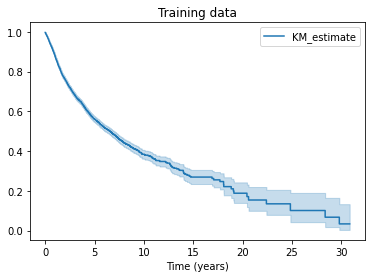

In [263]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(train['time'], event_observed=train['event'])
ax = kmf.plot(title='Training data')
ax.set_xlabel('Time (years)')
ax

<AxesSubplot:title={'center':'Validation data'}, xlabel='Time (years)'>

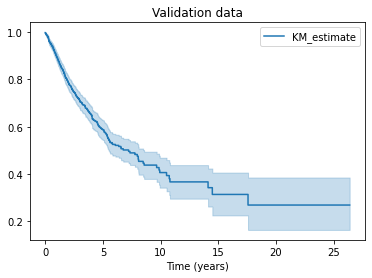

In [264]:
kmf = KaplanMeierFitter()
kmf.fit(val['time'], event_observed=val['event'])
ax = kmf.plot(title='Validation data')
ax.set_xlabel('Time (years)')
ax

<AxesSubplot:title={'center':'Test data'}, xlabel='Time (years)'>

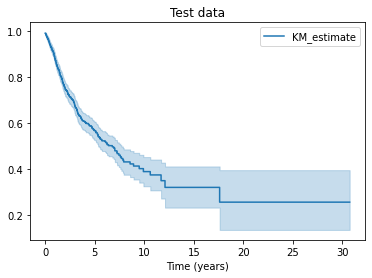

In [265]:
kmf = KaplanMeierFitter()
kmf.fit(test['time'], event_observed=test['event'])
ax = kmf.plot(title='Test data')
ax.set_xlabel('Time (years)')
ax: